<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_16_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del desgaste de vehículos Vehículos Militares

Como analista de datos en una base militar, tu tarea es predecir el **nivel de desgaste** de vehículos en función de las **horas de uso**.

Esta herramienta será clave para evitar fallos operativos y optimizar los mantenimientos preventivos.

## Tareas

Implementar un sistema basado en regresión lineal que:

+ Genere registros de entrenamiento con la clase VehicleDataGenerator.

+ Represente cada registro con la clase VehicleRecord, que almacene las horas de uso y el nivel de desgaste.

+ Entrene un modelo con la clase VehicleWearRegressor para aprender la relación entre las horas y el desgaste.

+ Visualice los resultados y permita hacer predicciones con la clase principal VehicleWearPredictionExample.

## Detalles técnicos:

Usa NumPy, Pandas, Matplotlib y LinearRegression de scikit-learn.

Los datos sintéticos deben simular que el desgaste aumenta con las horas de uso, con algo de ruido.

El modelo debe permitir predecir el nivel de desgaste de un nuevo vehículo dado sus horas de servicio.

Visualiza los datos reales y la línea de regresión, y marca en el gráfico la predicción del nuevo vehículo.

Organiza la solución en clases, siguiendo estos nombres:

|Propósito | Nombre de la clase |
|----------------------------|---------------------------|
|Representar un regístro de vehículo|VehicleRecord|
|Generar datos sintéticos|VehicleDataGenerator|
|Entrenar y usar el modelo|VehicleWearRegressor|
|Ejecutar el ejemplo completo|VehicleWearPredictionExample|


Ejemplo de uso
```Python
example = VehicleWearPredictionExample()
example.run()
```

## Salida esperada

⏱ Horas de uso estimadas: 250
⚙️ Nivel de desgaste estimado: 53.75%


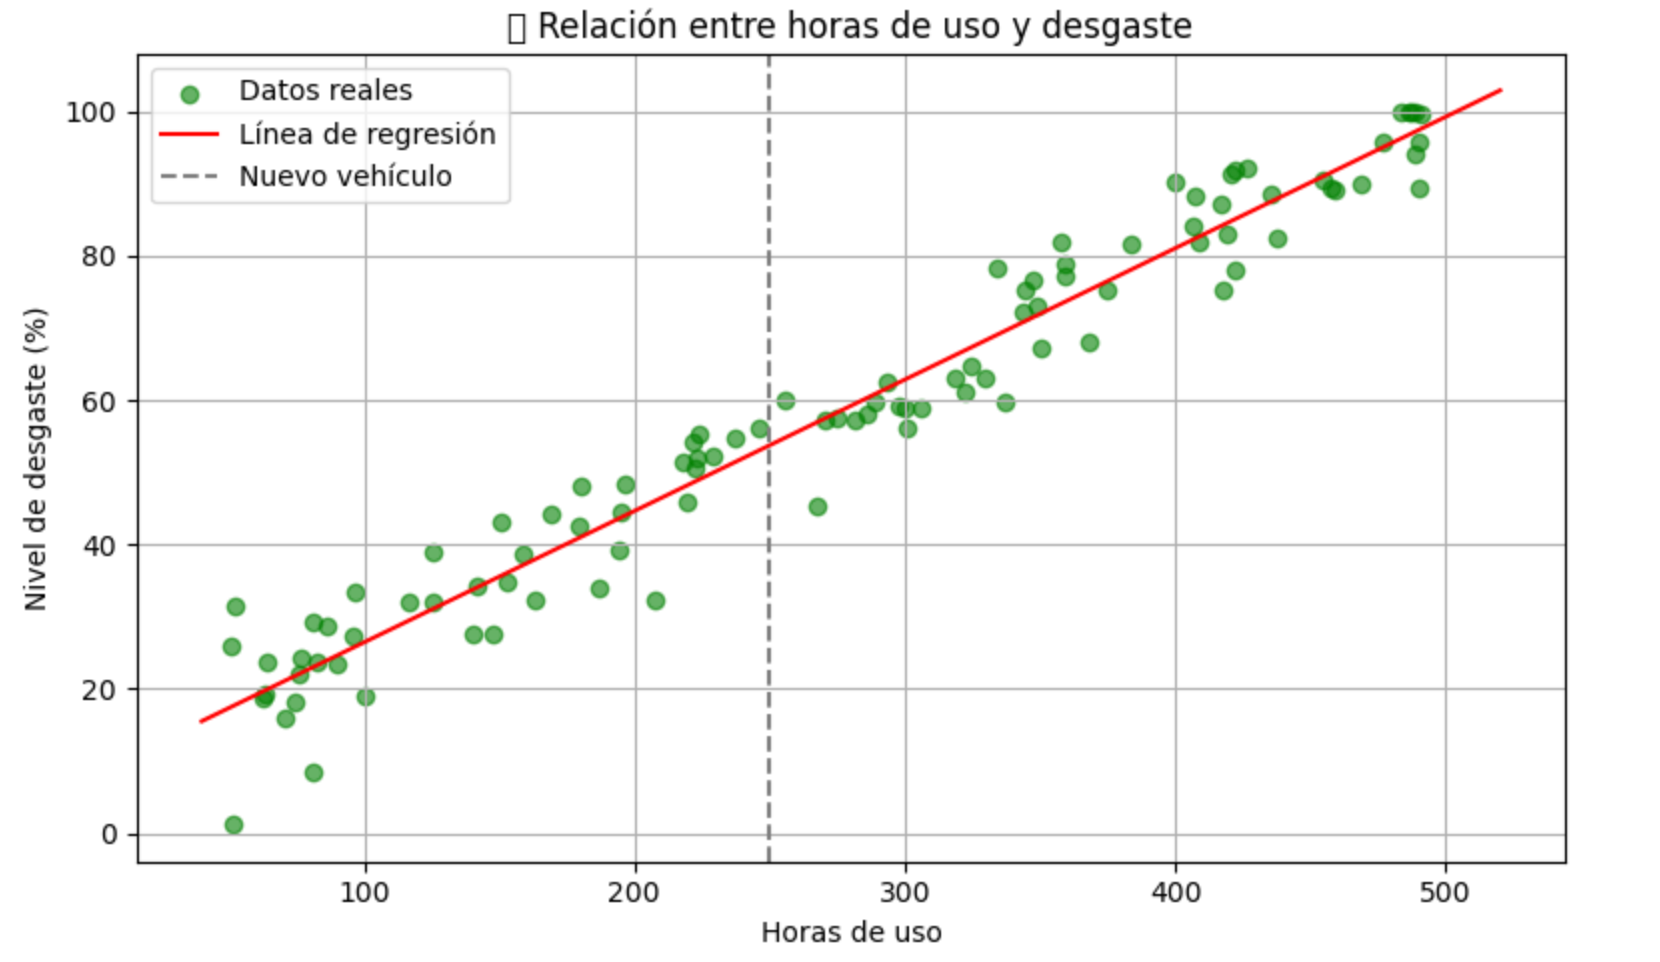

## importación de las librerias necesarias

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

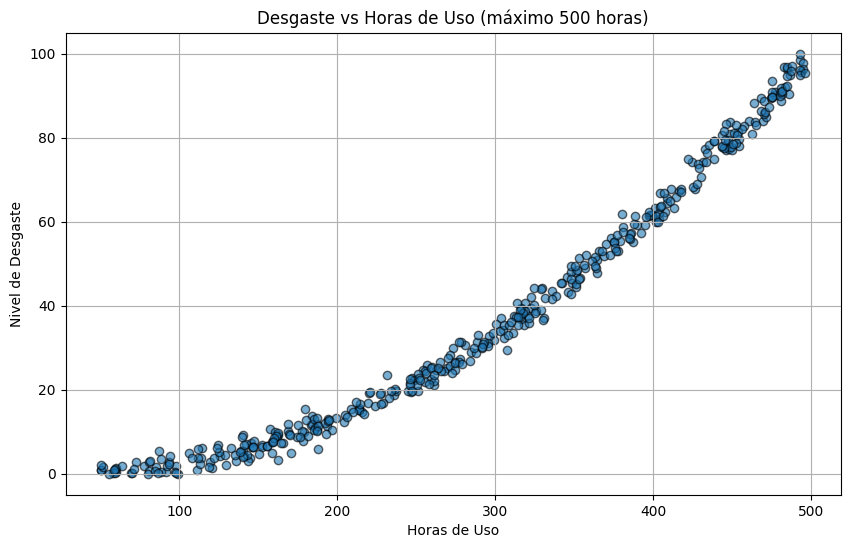

    horas_uso   desgaste
0  187.270059  11.889451
1  475.357153  93.496475
2  365.996971  53.055272
3  299.329242  31.744894
4   77.997260   1.895731


In [206]:

# Semilla para reproducibilidad
np.random.seed(42)

# Generar horas de uso entre 0 y 500
n_muestras = 500
horas_uso = np.random.uniform(0, 500, n_muestras)

# Parámetros del modelo de desgaste
umbral_inicio_desgaste = 50
a = 0.000449  # Ajustado para que desgaste llegue a 100 a las 500 horas
b = 0.02      # Pendiente moderada

# Cálculo del desgaste
desgaste_modelado = np.where(
    horas_uso > umbral_inicio_desgaste,
    a * (horas_uso - umbral_inicio_desgaste)**2 + b * (horas_uso - umbral_inicio_desgaste),
    0
)

# Ruido reducido
ruido = np.random.normal(0, 2, n_muestras)

# Aplicar ruido solo donde hay desgaste
desgaste = np.where(
    horas_uso > umbral_inicio_desgaste,
    desgaste_modelado + ruido,
    0
)

# Limitar desgaste al rango [0, 100]
desgaste = np.clip(desgaste, 0, 100)

# Crear DataFrame y eliminar registros con desgaste nulo
df = pd.DataFrame({
    'horas_uso': horas_uso,
    'desgaste': desgaste
})
df = df[df['desgaste'] > 0].reset_index(drop=True)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(df['horas_uso'], df['desgaste'], alpha=0.6, edgecolors='k')
plt.title('Desgaste vs Horas de Uso (máximo 500 horas)')
plt.xlabel('Horas de Uso')
plt.ylabel('Nivel de Desgaste')
plt.grid(True)
plt.show()

# Muestra de los datos generados
print(df.head())


## Creación de la clase VehicleRecord

In [207]:
class VehicleRecord:
  def __init__(self, hours: float, wear: float):
      """
      Representa un registro individual de un vehículo.

      :param hours: Horas de uso del vehículo.
      :param wear: Nivel de desgaste del vehículo.
      """
      self.hours = hours
      self.wear = wear

  def __repr__(self):
      return f"VehicleRecord(hours={self.hours}, wear={self.wear})"

## Creación de la clase VehicleDataGenerator

In [208]:
class VehicleDataGenerator:
  def __init__(self, semilla: int = 42, max_horas: int = 500):
    """
      Generador de datos sintéticos para desgaste de vehículos.
      :param seed: Semilla para reproducibilidad.
     """
    self.rng = np.random.default_rng(semilla)
    self.max_horas = max_horas

  def _calcula_desgaste(self, horas: int = 0) -> float:
    """
    Calcula el desgaste de un vehículo en función de sus horas de uso.

    :param horas: Horas de uso del vehículo.
    :return: Nivel de desgaste del vehículo.
    """
    # Relación desgaste-horas de uso (modelo cuadrático + ruido)
    a, b = 0.0001, 0.15
    # Ejemplo: desgaste = a * horas^2 + b * horas + ruido
    while True:
      ruido = self.rng.normal(0, 5)
      desgaste = a * horas**2 + b * horas + ruido
      if desgaste >= 0 and desgaste <= 100:
        break
    return  desgaste

  def generate(self, n_muestras: int = 500) -> list[VehicleRecord]:
    """
    Genera un conjunto de datos sintéticos de desgaste de vehículos.

    :param n_muestras: Número de muestras a generar.
    :return ;lista de registros de vehículos
    """
    lista_horas = self.rng.uniform(0, self.max_horas, n_muestras)
    # distribución uniforme de los valors de las horas. todos los valroes en el
    # rango tiene la misma probabilidad de ser elegidos.
    desgastes = [self._calcula_desgaste(horas) for horas in lista_horas]
    return [VehicleRecord(h, d) for h, d in zip(lista_horas, desgastes)]

#### Pruebas clase VehicleDataGenerator

In [209]:
vdg = VehicleDataGenerator(max_horas=500)
datos = vdg.generate()
i = 1
for dato in datos:
  print(i, dato)
  i = i + 1

1 VehicleRecord(hours=386.97802427798166, wear=80.18797530213712)
2 VehicleRecord(hours=219.43921987602616, wear=38.18884099424986)
3 VehicleRecord(hours=429.2989599556912, wear=85.72848917190647)
4 VehicleRecord(hours=348.684014529682, wear=64.17674040634239)
5 VehicleRecord(hours=47.088673943824766, wear=6.4329975071314776)
6 VehicleRecord(hours=487.811175818378, wear=93.07023871446044)
7 VehicleRecord(hours=380.56985099517647, wear=73.72032559271332)
8 VehicleRecord(hours=393.03215263847693, wear=70.1445642506062)
9 VehicleRecord(hours=64.05681633777294, wear=13.346776204166204)
10 VehicleRecord(hours=225.19296894778356, wear=44.27656769074882)
11 VehicleRecord(hours=185.3990121162906, wear=33.07978822299939)
12 VehicleRecord(hours=463.3824944243009, wear=89.54846410975539)
13 VehicleRecord(hours=321.93256004033225, wear=60.92376922400553)
14 VehicleRecord(hours=411.380806635415, wear=77.08717252438066)
15 VehicleRecord(hours=221.70709941366556, wear=42.84920433241767)
16 VehicleRec

## Creación de la clase VehicleWearRegressor

In [210]:
class VehicleWearRegressor:
  def __init__(self):
    self.model = LinearRegression()

  def _prepara_datos(self, datos: list[VehicleRecord]) -> tuple:
    """
    Prepara los datos de entrada para el modelo de regresión.
    """
    X = [dato.hours for dato in datos]
    Y = [dato.wear for dato in datos]
    return X, Y

  def fit(self, datos: list[VehicleRecord]):
    """
    Entrena el modelo de regresión.
    """
    X, Y = self._prepara_datos(datos)

    #print("lista->",X)
    # convertimos la lista X en un array unidimensional de aridad n (n, )
    # print("array->",np.array(X), "de dimensionalidad",np.shape(np.array(X)))
    # convertimos la lista X en un array bidimensional de n elemento en la
    # primera dimensio y 1 elemento en la segunda dimensión (n, 1)
    # print("array->",np.array(X).reshape(-1, 1), "de dimensionalidad",np.shape(np.array(X).reshape(-1, 1)))
    self.model.fit(np.array(X).reshape(-1, 1), Y)

  def predict(self, horas: float) -> float:
    """
    Predice el desgaste de un vehículo.
    """
    return self.model.predict([[horas]])[0]

  def get_model(self):
    return self.model


#### test a la clase VehicleWearRegression

In [211]:
vwr = VehicleWearRegressor()
vwr.fit(datos)
print(vwr.predict(64))

9.282272080443876


## Creación de la clase VehicleWearPredictionExample



In [212]:
class VehicleWearPredictionExample:
  def __init__(self):
    self.vdg = VehicleDataGenerator(max_horas=500)
    self.vwr = VehicleWearRegressor()

  def Visualización(self, datos, nueva_hora_uso, prediccion):
    plt.figure(figsize=(10, 6))
    h = [dato.hours for dato in datos]
    d = [dato.wear for dato in datos]
    p = [self.vwr.predict(dato.hours) for dato in datos]
    df = pd.DataFrame({'horas_uso': h, 'desgaste': d})
    plt.scatter(x=df['horas_uso'], y = df['desgaste'] ,alpha=0.6, color='green', edgecolors='g', label='Datos reales')
    plt.plot(h, p, color='red', linewidth=1, linestyle='-', label='Línea de regresión')
    plt.scatter(x=nueva_hora_uso, y = prediccion ,alpha=1, color='blue', edgecolors='blue', label='Nuevo vehículo')
    plt.title('Relación entre horas y desgaste')
    plt.xlabel('Horas de Uso')
    plt.ylabel('Nivel de Desgaste (%)')
    plt.legend()
    plt.grid(True)

  def run(self):
    datos = vdg.generate()
    self.vwr.fit(datos)
    horas = 250
    print(f"⏱ Horas de uso estimado: {horas}")
    wear = self.vwr.predict(horas)
    print(f"⚙️ Nivel de desgaste estimado: {wear:.2f}%")
    self.Visualización(datos, horas, wear)

### Test de la clase VehicleWearPredictionExample:

⏱ Horas de uso estimado: 250
⚙️ Nivel de desgaste estimado: 45.27%


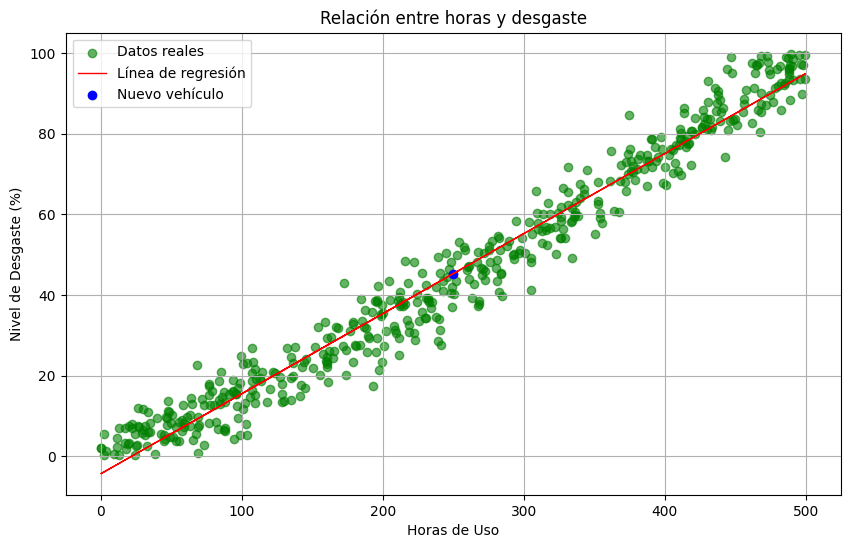

In [213]:
vwpr = VehicleWearPredictionExample()
vwpr.run()